In [1]:
from BigDFT import Datasets as D, Calculators as C, Inputfiles as I, Logfiles as lf
from futile.Utils import write
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0,'../')
import StatPol as SP

# Analysis of the StatPol module

This nb describe the usage of the StatPol module that allows us to compute the statical polarizability of a system and to perform convergence analysis w.r.t. the intensity of the static field and the size of the simulation domain

We assume that the GS analysis for a set of molecule has been performed. The structure of this working directory consists in a folder for each molecule. Inside each folder there is one logifle (or more if different study varying for instance xc functional or equilibrium position) that contains the result of the GS computation used as input of the present analysis

Scan the path folder and build the molecules_database by looking at the directories in the path

In [2]:
molecules_database = SP.get_molecule_database()
molecules_database

['H20', 'CO']

Choose a molecule to perform the analysis, move the path in the associated folder and get the relevant parameters of the gs analysis

In [3]:
molecule = molecules_database[1]
%cd $molecule
sys.path.insert(1,'../../')
posinp_file = molecule+'_posinp.xyz'
gs = lf.Logfile('log-lda.yaml')

/home/marco/Data/RICERCA/LINEAR RESPONSE/Statical polarizability - Testset analysis/Notebook/Tutorial for StatPol module/CO


## Computation of alpha for a specific choice of the input parameters

Build the input file and define the parameters common to all the runs.

The values of rmult and of the field intensity will be specified subsequently since a convergence study will be performed on this parameters.

As a first usage of the module we compute the statical polarizabiltiy tensor for a specific choice of the field intensity and the simulation domain

In [4]:
fieldInt = 1e-2

inp = I.Inputfile()
inp.set_hgrid(gs.log['dft']['hgrids'])
inp.set_xc('LDA')
inp.set_wavefunction_convergence(gnrm=1.0e-5)
inp.set_rmult(gs.log['dft']['rmult'])
inp

{'dft': {'gnrm_cv': 1e-05, 'hgrids': 0.37, 'ixc': 'LDA', 'rmult': [7.0, 9.0]}}

In [13]:
code=C.SystemCalculator(omp=2,mpi_run='mpirun -np 4',skip=True)

Initialize a Calculator with OMP_NUM_THREADS=2 and command mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft


In [14]:
reload(SP)
a = SP.build_alpha_dataset(run_dir='alpha',intensity=fieldInt,input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)
# display some info on a
write(a.global_options())
ind = 0
write(a.runs[ind])

{'run_dir': 'alpha', 'intensity': 0.01, 'posinp': 'CO_posinp.xyz', 'label': 'alpha_0.01'}
{'run_dir': 'alpha', 'input': {'dft': {'ixc': 'LDA', 'gnrm_cv': 1e-05, 'elecfield': [0.01, 0.0, 0.0], 'hgrids': 0.37, 'rmult': [7.0, 9.0]}}, 'intensity': 0.01, 'posinp': 'CO_posinp.xyz', 'label': 'alpha_0.01'}


In [15]:
alpha = a.run()
alpha

Copy the posinp file 'CO_posinp.xyz' into 'alpha'
Creating the yaml input file "alpha/F:0.01,dir:x,rmult:7.0,sign:+.yaml"
Run directory alpha
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n F:0.01,dir:x,rmult:7.0,sign:+ -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'alpha'
Creating the yaml input file "alpha/F:0.01,dir:y,rmult:7.0,sign:+.yaml"
Run directory alpha
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n F:0.01,dir:y,rmult:7.0,sign:+ -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'alpha'
Creating the yaml input file "alpha/F:0.01,dir:z,rmult:7.0,sign:+.yaml"
Run directory alpha
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n F:0.01,dir:z,rmult:7.0,sign:+ -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'alpha'
Creating the yaml input file "alpha/F:0.01,dir:x,rmult:7.0,sign:-.yaml"
Run directory alpha
Executing co

matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
        [-1.279955e-05,  1.323614e+01, -3.389697e-05],
        [-1.125000e-04, -1.125000e-04,  1.856809e+01]])

The verbose option of SystemCalculator can be used to limit the display on terminal

In [16]:
code.update_global_options(verbose=False)
alpha = a.run()
alpha

matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
        [-1.279955e-05,  1.323614e+01, -3.389697e-05],
        [-1.125000e-04, -1.125000e-04,  1.856809e+01]])

In [17]:
write(SP.eval_alpha_avg(alpha))

15.013456666666668


## Usage of the seek_convergence function

We have defined the function seek_convergence that take as input the dataset associated to a convergence parameter and perform a convergence analysis.
The features and usage of this function is described in the next example, in which we discuss the convergence of the statical polarizability w.r.t. the intensity of the field

In [18]:
field_int = [1e-2,5e-3,1e-3]
data = []
code.update_global_options(verbose=False)
for f in field_int:
    data.append(SP.build_alpha_dataset(run_dir='alpha',intensity=f,input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha))
    
SP.seek_convergence(rt=1e-2,label='field_int',values=field_int,data=data)

Perform the run with field_int 0.01
Perform the run with field_int 0.005
Convergence achieved for field_int 0.01


{'converged': True,
 'converged_value': 0.01,
 'label': 'field_int',
 'results': {0.001: None,
  0.005: matrix([[ 1.3211721e+01, -4.5186718e-04, -2.4358770e-05],
          [-4.5186719e-04,  1.3211721e+01, -2.4358770e-05],
          [ 1.0600000e-04,  1.0600000e-04,  1.8530906e+01]]),
  0.01: matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
          [-1.279955e-05,  1.323614e+01, -3.389697e-05],
          [-1.125000e-04, -1.125000e-04,  1.856809e+01]])},
 'values': [0.01, 0.005, 0.001]}

## Convergence analysis w.r.t the intensity of the field

We make usage of the seek_convergence function to define a tool that perform the convergence study w.r.t. the 
intensity of the field.
We remember that the comparison is performed with np.allclose functions that returns true if

abs(a-b) < atol + rtol*abs(b)

So for small elements that are deeply affected by numerical noise the maximum allowed discrepacy is atol while for the relevant ones the percentage difference is rtol. 

In [14]:
reload(SP)
inp = I.Inputfile()
inp.set_hgrid(gs.log['dft']['hgrids'])
inp.set_xc('LDA')
inp.set_wavefunction_convergence(gnrm=1.0e-5)
inp.set_rmult(gs.log['dft']['rmult'])

SP.perform_field_convergence(rt=1e-2,run_dir='alpha',input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)

Perform the run with field_int 0.01
Perform the run with field_int 0.005
Convergence achieved for field_int 0.01


{'converged': True,
 'converged_value': 0.01,
 'label': 'field_int',
 'results': {0.001: None,
  0.005: matrix([[ 1.3211721e+01, -4.5186718e-04, -2.4358770e-05],
          [-4.5186719e-04,  1.3211721e+01, -2.4358770e-05],
          [ 1.0600000e-04,  1.0600000e-04,  1.8530906e+01]]),
  0.01: matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
          [-1.279955e-05,  1.323614e+01, -3.389697e-05],
          [-1.125000e-04, -1.125000e-04,  1.856809e+01]])},
 'values': [0.01, 0.005, 0.001]}

## Convergence analysis w.r.t. the size of the simulation domain

In an analogous way we build the tool to perform the convergence w.r.t the dimension of the simulation domain (i.e. the coarse value of the rmult parameter). In this case the intensity of the field has to be provided as input

In [15]:
reload(SP)
inp = I.Inputfile()
inp.set_hgrid(gs.log['dft']['hgrids'])
inp.set_xc('LDA')
inp.set_wavefunction_convergence(gnrm=1.0e-5)
f = 1e-2

rmult_list=SP.build_rmult_list(gs)
SP.perform_rmult_convergence(run_dir='alpha',intensity=f,rmult=rmult_list,input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)

Perform the run with rmult 7.0
Perform the run with rmult 8.0
Convergence achieved for rmult 7.0


{'converged': True,
 'converged_value': 7.0,
 'label': 'rmult',
 'results': {7.0: matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
          [-1.279955e-05,  1.323614e+01, -3.389697e-05],
          [-1.125000e-04, -1.125000e-04,  1.856809e+01]]),
  8.0: matrix([[ 1.32401e+01, -1.15354e-05, -7.16880e-05],
          [-1.15354e-05,  1.32401e+01, -7.16880e-05],
          [ 1.57000e-04,  1.57000e-04,  1.85763e+01]]),
  9.0: None,
  10.0: None,
  11.0: None},
 'values': [7.0, 8.0, 9.0, 10.0, 11.0]}

## An example of convergence workflow

These tools can be used to build a complete workflow that produces the polarizability starting from the GS computation.

For instance we can evaluate the convergence value of the field intensity for the value of rmult of the GS analysis and then perform a rmult convergence using this value of the field. This procedure can be implemented as follows:

In [16]:
reload(SP)

rtol=1e-2

inp = I.Inputfile()
inp.set_hgrid(gs.log['dft']['hgrids'])
inp.set_xc('LDA')
inp.set_wavefunction_convergence(gnrm=1.0e-5)
inp.set_rmult(gs.log['dft']['rmult'])

field_conv=SP.perform_field_convergence(rt=rtol,run_dir='alpha',input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)

f=field_conv['converged_value']
rmult_list=SP.build_rmult_list(gs)

rmult_conv=SP.perform_rmult_convergence(rt=rtol,run_dir='alpha',intensity=f,rmult=rmult_list,input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)
alpha =  rmult_conv['results'][rmult_conv['converged_value']]
alpha

Perform the run with field_int 0.01
Perform the run with field_int 0.005
Convergence achieved for field_int 0.01
Perform the run with rmult 7.0
Perform the run with rmult 8.0
Convergence achieved for rmult 7.0


matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
        [-1.279955e-05,  1.323614e+01, -3.389697e-05],
        [-1.125000e-04, -1.125000e-04,  1.856809e+01]])

The dictionary field_conv and rmult_conv contain all the data of the convergence analysis and can be used to check the procedure

In [17]:
write(field_conv)
write(rmult_conv)

{'converged': True, 'converged_value': 0.01, 'values': [0.01, 0.005, 0.001], 'results': {0.001: None, 0.005: matrix([[ 1.3211721e+01, -4.5186718e-04, -2.4358770e-05],
        [-4.5186719e-04,  1.3211721e+01, -2.4358770e-05],
        [ 1.0600000e-04,  1.0600000e-04,  1.8530906e+01]]), 0.01: matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
        [-1.279955e-05,  1.323614e+01, -3.389697e-05],
        [-1.125000e-04, -1.125000e-04,  1.856809e+01]])}, 'label': 'field_int'}
{'converged': True, 'converged_value': 7.0, 'values': [7.0, 8.0, 9.0, 10.0, 11.0], 'results': {8.0: matrix([[ 1.32401e+01, -1.15354e-05, -7.16880e-05],
        [-1.15354e-05,  1.32401e+01, -7.16880e-05],
        [ 1.57000e-04,  1.57000e-04,  1.85763e+01]]), 9.0: None, 10.0: None, 11.0: None, 7.0: matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
        [-1.279955e-05,  1.323614e+01, -3.389697e-05],
        [-1.125000e-04, -1.125000e-04,  1.856809e+01]])}, 'label': 'rmult'}


## Perform an iteration over a parameter

Iteration over the field_int

In [18]:
reload(SP)
inp = I.Inputfile()
inp.set_hgrid(gs.log['dft']['hgrids'])
inp.set_xc('LDA')
inp.set_wavefunction_convergence(gnrm=1.0e-5)
inp.set_rmult([7.0,9.0])
f_int = [1e-1,5e-2,1e-2,5e-3,1e-3]

f_iter=SP.perform_field_iteration(run_dir='alpha',field_int=f_int,input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)

Run the dataset with field_int 0.1
Run the dataset with field_int 0.05
Run the dataset with field_int 0.01
Run the dataset with field_int 0.005
Run the dataset with field_int 0.001


In [19]:
f_iter

{'converged': None,
 'converged_values': None,
 'label': 'field_int',
 'results': {0.001: matrix([[ 1.32041850e+01, -1.70408565e-03, -1.76627000e-05],
          [-1.70408565e-03,  1.32041850e+01, -1.76627000e-05],
          [-1.05000000e-04, -1.05000000e-04,  1.85191700e+01]]),
  0.005: matrix([[ 1.3211721e+01, -4.5186718e-04, -2.4358770e-05],
          [-4.5186719e-04,  1.3211721e+01, -2.4358770e-05],
          [ 1.0600000e-04,  1.0600000e-04,  1.8530906e+01]]),
  0.01: matrix([[ 1.323614e+01, -1.279955e-05, -3.389697e-05],
          [-1.279955e-05,  1.323614e+01, -3.389697e-05],
          [-1.125000e-04, -1.125000e-04,  1.856809e+01]]),
  0.05: matrix([[ 1.4739724e+01,  4.8563000e-05, -2.0940130e-03],
          [ 4.8563000e-05,  1.4739724e+01, -2.0940130e-03],
          [-2.0219000e-03, -2.0219000e-03,  2.1474140e+01]]),
  0.1: matrix([[ 2.8612880e+01, -3.9930000e-04, -4.4282500e-03],
          [-3.9992500e-04,  2.8612825e+01, -4.4282000e-03],
          [-5.4468825e-01, -5.4468690e-0

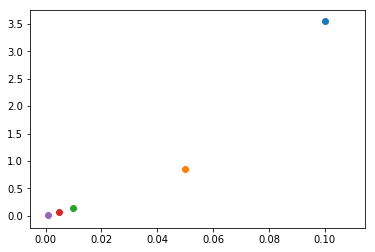

In [20]:
# plot the induced dipole
values = f_iter['values']
for x in values:
    a = f_iter['results'][x]
    if a is not None:
        y = SP.eval_alpha_avg(a)*x
        plt.scatter(x,y)
plt.show()

Iteration over rmult

In [21]:
reload(SP)
inp = I.Inputfile()
inp.set_hgrid(gs.log['dft']['hgrids'])
inp.set_xc('LDA')
inp.set_wavefunction_convergence(gnrm=1.0e-5)
f = 1e-2

rmult_list=[[float(i),9.0] for i in range(4,10)]
rmult_iter=SP.perform_rmult_iteration(run_dir='alpha',intensity=f,rmult=rmult_list,input=inp,runner=code,posinp=posinp_file,ppf=SP.eval_alpha)

Run the dataset with rmult 4.0
Run the dataset with rmult 5.0
Run the dataset with rmult 6.0
Run the dataset with rmult 7.0
Run the dataset with rmult 8.0
Run the dataset with rmult 9.0


In [22]:
#rmult_iter

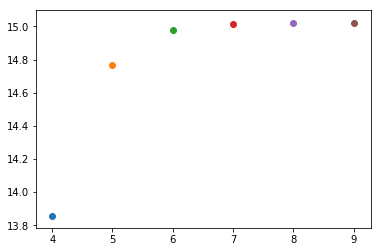

In [23]:
values = rmult_iter['values']
for x in values:
    a = rmult_iter['results'][x]
    if a is not None:
        y = SP.eval_alpha_avg(a)
        plt.scatter(x,y)
plt.show()